# Introduction

Welcome to *tntorch*! This notebook illustrates a few basic tensor manipulation and optimization use cases.

### First Example

In [1]:
import torch
import tntorch as tn

Let's create a 2D random tensor of size $128 \times 128$ and tensor train rank 10 (equivalent to a rank-10 matrix). The `requires_grad` flag tells PyTorch that this tensor should be optimizable:

In [2]:
t = tn.randn([128, 128], ranks_tt=10, requires_grad=True)
t

2D TT tensor:

 128 128
  |   |
 (0) (1)
 / \ / \
1   10  1

The spatial dimensions are shown above, the TT ranks are below, and the cores are listed as `(0)` and `(1)` in the middle.

In many ways, compressed tensors can be treated as if they were normal, uncompressed tensors:

In [3]:
print(tn.mean(t))
print(tn.var(t))
print(tn.norm(t))
print(tn.norm(t+t))
print(tn.norm(2*t))

tensor(0.0109, grad_fn=<DivBackward1>)
tensor(10.5589, grad_fn=<DivBackward1>)
tensor(415.9317, grad_fn=<SqrtBackward>)
tensor(831.8634, grad_fn=<SqrtBackward>)
tensor(831.8634, grad_fn=<SqrtBackward>)


To decompress a tensor into a `torch.Tensor`, we can use the function `full()`:

In [4]:
print(t.full().shape)

torch.Size([128, 128])


The function `numpy()` returns the same, just as a NumPy tensor. Let's use it to visualize the contents of our random tensor in *matplotlib*:

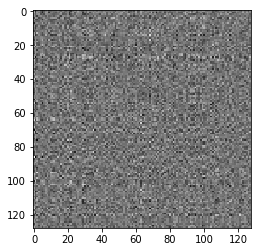

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(t.numpy(), cmap='gray')
plt.show()

To optimize tensors we can use *tntorch*'s helper function `optimize()`. 

Now, we will make our tensor zero over the top left quadrant by minimizing its norm:

iter: 0      | loss: 208.418518 | total time:    0.0015
iter: 500    | loss:  86.674209 | total time:    0.3718
iter: 1000   | loss:  17.489526 | total time:    0.7373
iter: 1244   | loss:   0.099192 | total time:    0.9085 <- converged (tol=0.0001)


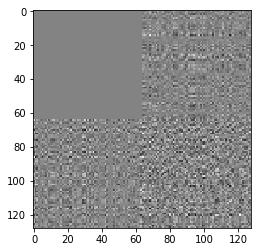

In [6]:
def loss(t):
    return tn.norm(t[:64, :64])

tn.optimize(t, loss)
plt.imshow(t.numpy(), cmap='gray')
plt.show()

### Second Example

Next, we will fit our tensor to be a rank-10 approximation of a grayscale image:

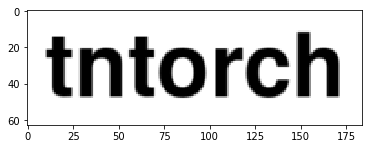

iter: 0      | loss: 343.592955 | total time:    0.0006
iter: 500    | loss: 169.464992 | total time:    0.4853
iter: 1000   | loss:  64.356449 | total time:    1.0171
iter: 1500   | loss:  20.444499 | total time:    1.5235
iter: 2000   | loss:  16.074928 | total time:    2.1074
iter: 2500   | loss:  12.169590 | total time:    2.6363
iter: 3000   | loss:  10.226698 | total time:    3.1311
iter: 3500   | loss:   8.601232 | total time:    3.6725
iter: 4000   | loss:   7.133071 | total time:    4.1760
iter: 4500   | loss:   6.220729 | total time:    4.6673
iter: 5000   | loss:   5.714370 | total time:    5.2559
iter: 5500   | loss:   5.403053 | total time:    5.7655
iter: 6000   | loss:   5.070662 | total time:    6.2698
iter: 6500   | loss:   4.508856 | total time:    6.7935
iter: 7000   | loss:   3.862554 | total time:    7.3149
iter: 7500   | loss:   3.466812 | total time:    7.8319
iter: 7731   | loss:   3.369795 | total time:    8.0749 <- converged (tol=0.0001)


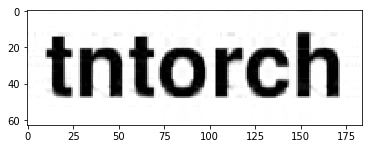

In [7]:
im = torch.DoubleTensor(plt.imread('../images/text.png'))
plt.imshow(im.numpy(), cmap='gray')
plt.show()

t = tn.randn(im.shape, ranks_tt=10, requires_grad=True)

def loss(t):
    return torch.norm(t.full() - im)

tn.optimize(t, loss)   

plt.imshow(t.numpy(), cmap='gray', vmin=im.min(), vmax=im.max())
plt.show()